In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# naive bayes
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,[2,3]]
Y = data.iloc[:,4]

In [5]:
Y.shape

(400,)

In [6]:
y.shape

NameError: name 'y' is not defined

dimensions de X: (400, 2)
dimensions de y: (400,)


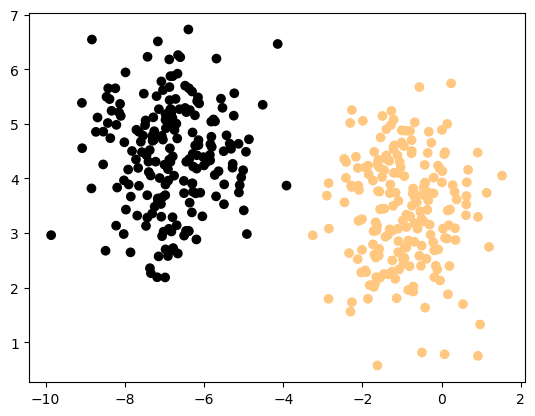

In [8]:
X, y = make_blobs(n_samples=400, n_features=2, center_box=(-8.0, 8.0), centers=2, random_state=7)
# y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap="copper")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [11]:
from sklearn.naive_bayes import  GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
pred_y = classifier.predict(X_test)

accuracy = classifier.score(X_test,Y_test)
print(accuracy)

1.0


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)

print(cm)

[[61  0]
 [ 0 59]]


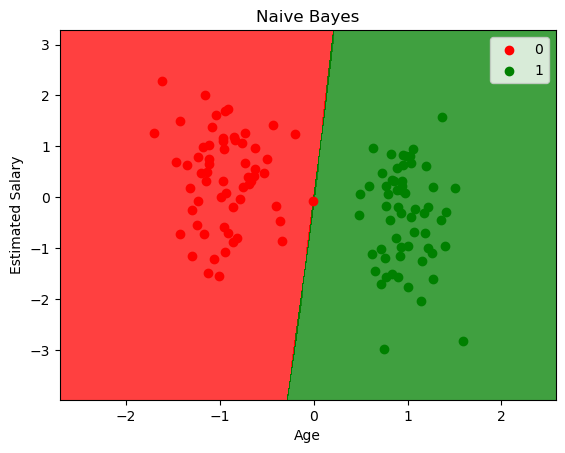

In [13]:
from matplotlib.colors import ListedColormap
x_set,y_set = X_test, Y_test
X1,X2 = np.meshgrid(np.arange(x_set[:,0].min()-1,x_set[:,0].max()+1,step=0.01),
                    np.arange(x_set[:,1].min()-1,x_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha= 0.75,
             cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1], color= ListedColormap(('red','green'))(i),label=j)

plt.title('Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()